# Exam

Use the following table to provide us with

|name | exam number|
|----|----|
|Saskia Luijk| snr 2001906 |


In this exam, we will work with the "frequently requested health data” from the OECD.
Your task is to compute a simple “efficiency score” and make three plots. 


You will earn a higher grade if you provide nicer graphs.  


Now you need to call the libaries

* ggplot2
* dplyr



In [15]:
library(dplyr)
library(ggplot2)


Now you have to read the de data that we have cleaned during tutorial 3. The csv file is called oecddata.csv

In [22]:
oecd<-read.csv2("oecddata.csv", sep=";")

To see how the data look like, use the command:

head(oecd)

With the command

oecd


You can see the dataset in total.

In [23]:
head(oecd)

X,Country,Year,Cost,LE
1,Australia,2005,2842.132,80.9
2,Australia,2006,3023.098,81.1
3,Australia,2007,3196.226,81.4
4,Australia,2008,3310.171,81.5
5,Australia,2009,3564.405,81.6
6,Australia,2010,3607.341,81.8


## Graphs

To make the graphs we need to make selections of the data. Please use "dplyr" (commands "select" and "filter") and the "pipe". The first assignment is to make a scatterplot using "ggplot". The graph contains data for all countries for the year 2014. Therefore make a dataframe with dplyr first, called "graph1" with the required data.
Then, make a scatterplot with "Cost" on the x-axis and "LE" on the y-axis. You have to add a regression line with a shaded area for the confidence interval.

In [32]:
graph1 <-  oecd %>%
            filter(Year==2014)%>%
            select(Country,Cost,LE)

In [33]:
graph1

Country,Cost,LE
Australia,4206.8516,82.4
Austria,4895.9992,81.6
Belgium,4522.0450,81.4
Canada,4491.7648,NA
Chile,1688.5233,79.0
Czech Republic,2386.3385,78.9
Denmark,4857.0285,80.8
Estonia,1724.5100,77.2
Finland,3870.4000,81.3
France,4366.9864,82.8


Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

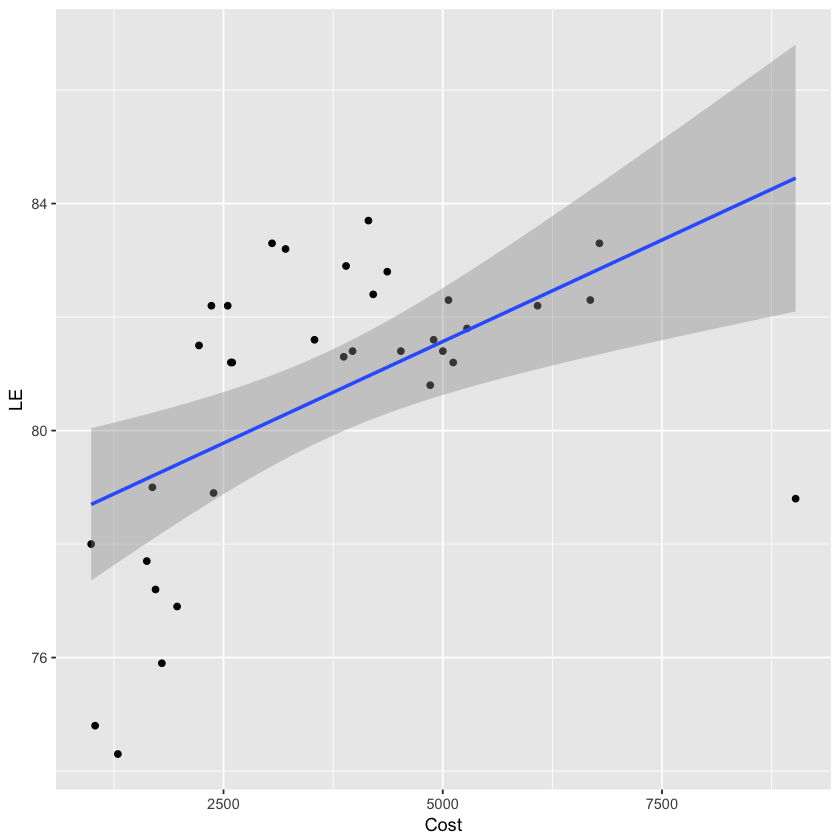

In [34]:
ggplot(graph1, aes(x = Cost, y = LE)) +geom_point() + geom_smooth(method=lm)

The second assignment is to make a line graph. You will use the years 2005-2015 for 5 countries (you can choose your own countries). Make a new dataframe called graph2 with the required data. Then, make a line graph with "Year"  and "Cost" on the y-axis. There should be coloured lines per country and a legend attached. 

In [35]:
Countries = c("Netherlands", "Latvia", "United States", "Iceland", "Greece")


In [38]:

graph2 <- oecd %>%
            select(Country,Year,Cost)%>%
            filter(Country == Countries,Year == 2005:2015)


In [39]:
graph2

Country,Year,Cost
Greece,2008,3040.991
Greece,2013,2339.783
Iceland,2005,3294.473
Iceland,2010,3405.986
Iceland,2015,4011.997
Latvia,2007,1099.183
Latvia,2012,1148.792
Netherlands,2008,4398.274
Netherlands,2013,5250.306
United States,2008,7414.043


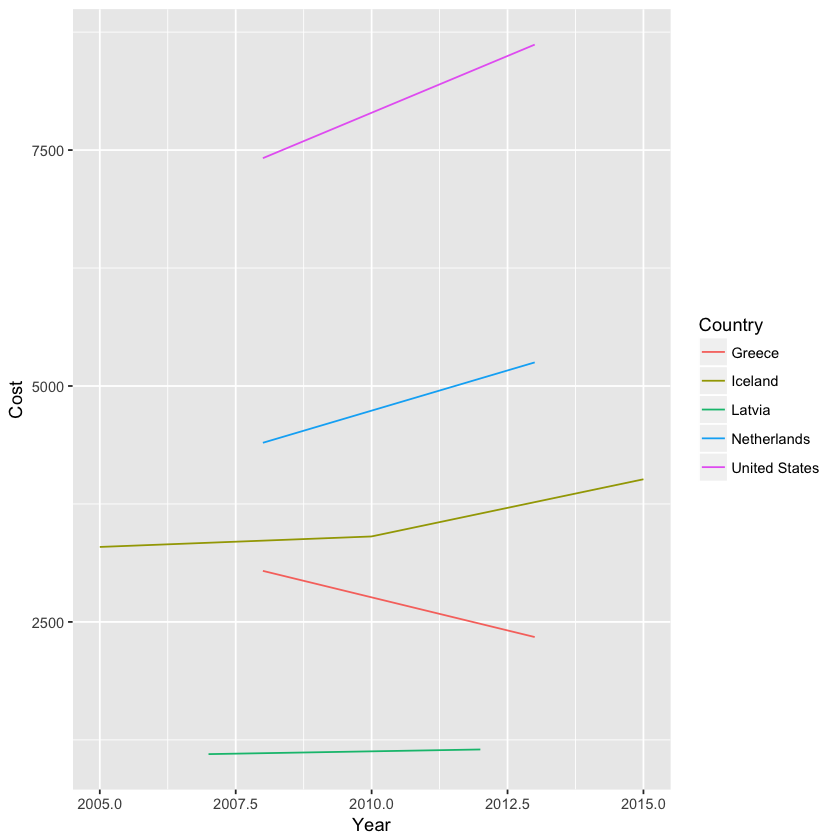

In [163]:
ggplot(graph2, aes(x = Year, y = Cost, color = Country)) + geom_line()

## Efficiency scores

The last assignment is to compute simple effiency scores. We will use the year 2014 for all countries (i.e. the dataframe "graph1").
Make a new dateframe called "eff" (using graph1). Please use the "pipe" to execute to following steps:
Select all the variables except the NA's (hint: use na.omit) and create a new column called "Ratio" with mutate. Ratio is defined as "Cost/LE" (cost per output).
Create a new column called "Score" with mutate. Score is the ratio per country divided by the lowest ratio in the dataframe.
To complete this dataframe order the dataset using "arrange" based on score (i.e. lowest Score first).


Finally make a bar chart using ggplot. Countries should be on the x-axis and "Score" on the y-axis. 



You can earn extra points if you are able to order the graph based on scores (lowest first, highest last), if you are able to make the x-axis readable, make the bar of the Netherlands red and the other bars blue and/or change the name of the y-axis to "Efficiency scores according to [your name]" 


The figure should like this:

![My Figure](https://edubb.uvt.nl/bbcswebdav/pid-1510322-dt-content-rid-5098872_1/courses/346013-2016-2017/eff.png) 





In [40]:
#The figure doesn't look quite the same
#because they determined the Score : the lowest ratio / the ratio per country
                       #instead of : the ratio per country / the lowest ratio

In [41]:
eff <- graph1 %>%
        na.omit()%>%
        mutate(Ratio = Cost / LE) %>%
        mutate(Score = Ratio / min(Ratio))%>%
        arrange(Score)

In [42]:
eff

Country,Cost,LE,Ratio,Score
Turkey,990.1908,78.0,12.69475,1.000000
Mexico,1035.3389,74.8,13.84143,1.090327
Latvia,1295.0128,74.3,17.42951,1.372970
Poland,1624.8655,77.7,20.91204,1.647298
Chile,1688.5233,79.0,21.37371,1.683665
Estonia,1724.5100,77.2,22.33821,1.759641
Hungary,1796.6034,75.9,23.67066,1.864602
Slovak Republic,1970.5230,76.9,25.62449,2.018510
Greece,2220.1065,81.5,27.24057,2.145813
Korea,2361.4400,82.2,28.72798,2.262981


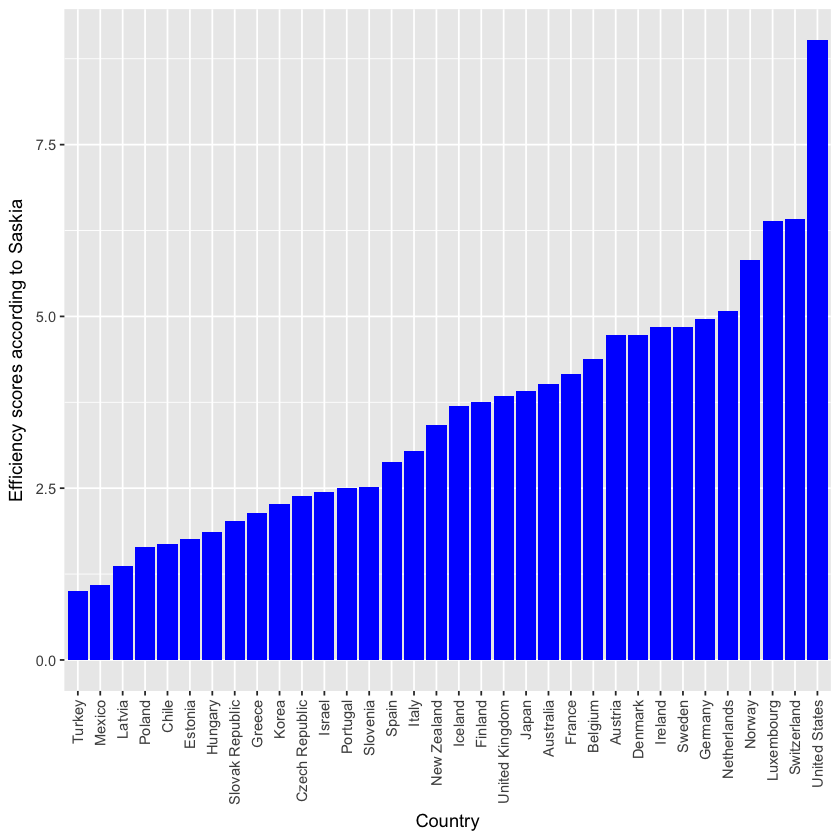

In [88]:
ggplot(eff, aes(x=reorder(Country,Score), y=Score, fill=Country)) + 
          geom_bar(stat='identity', fill="blue") + theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5)) +
        labs(x="Country",y="Efficiency scores according to Saskia")